# Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow THIRD EDITION Exercises

---

_**Nathan Jones - 05/2023**_

_**My answers to the chapter exercises from this [textbook](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)**_

---

## Table of Contents
[Chapter 1](#Chapter-1)
* [Reading Notes](#Chapter-1-rn)
* [Exercises](#Chapter-1-ex)

[Chapter 2](#Chapter-2)
* [Reading Notes](#Chapter-2-rn)
* [Exercises](#Chapter-2-ex)

[Chapter 3](#Chapter-3)
* [Reading Notes](#Chapter-3-rn)
* [Exercises](#Chapter-3-ex)

[Chapter 4](#Chapter-4)
* [Reading Notes](#Chapter-4-rn)
* [Exercises](#Chapter-4-ex)

[Chapter 5](#Chapter-5)
* [Reading Notes](#Chapter-5-rn)
* [Exercises](#Chapter-5-ex)

[Chapter 6](#Chapter-6)
* [Reading Notes](#Chapter-6-rn)
* [Exercises](#Chapter-6-ex)

[Chapter 7](#Chapter-7)
* [Reading Notes](#Chapter-7-rn)
* [Exercises](#Chapter-7-ex)

[Chapter 8](#Chapter-8)
* [Reading Notes](#Chapter-8-rn)
* [Exercises](#Chapter-8-ex)

[Chapter 9](#Chapter-9)
* [Reading Notes](#Chapter-9-rn)
* [Exercises](#Chapter-9-ex)

[Chapter 10](#Chapter-10)
* [Reading Notes](#Chapter-10-rn)
* [Exercises](#Chapter-10-ex)

---


<a id='Chapter-1'></a>
## Chapter 1

---

<a id='Chapter-1-rn'></a>
### Reading Notes:

**Question 1:** Why you perform hyperparameter tuning on the training set only?

**Answer:** If you tune the model to score well on the test set then you are adapting the model and it's hyperparameters to produce the best model for that *particular set of data* (the test set)

**Question 2:** What is **holdout validation** and the **validation (dev) set**?

**Answer:** Holdout validation is when you take a chunk of the training set out and then evaluate several candiate models to select the best one. The chunk you took out is called the **validation** or **dev set**. You would train all of your candidate models on the training set minus the dev set, and then select the model that performed the best on the dev set. Once you have selected a model, you retrain the model on the entire training set (including the dev set you took out), and this becomes your final model. The last step is evaluating the final model on the test set to get an estimate of the generalization error. A more common approach if the data is small enough is to use k-fold CV.

<a id='Chapter-1-ex'></a>
### Exercises

1. Machine Learning is the use of computers and algorithms to gain insights from data without hardcoding rules and using rule base systems.

1. Machine Learning is good for problems without an algorithmic solution, replaces tedious manual work, adapt to changes quicker, and help humans learn.

1. A labeled training set is one where the target variable has known labels.

1. Regression, Classification

1. Clustering, Association, Dimensionality Reduction, Anomaly Detection

1. Reinforcement Learning

1. Clustering

1. Supervised

1. An online learning system is retrained "on the fly", or as new data comes in. It lets you update model parameters and is less computationally expensive than batch learning since you don't retrain the entire model over again, but instead train incrementally.

1. Out of core learning is when you have huge datasets that cannot fit in one machine's main memory. An out of core algorithm chunks the data into mini-batches and uses online learning to learn from the mini-batches

1. Instance Based

1. A model parameter is learned from training on the data (internal). A model hyperparameter is set by the engineer (external) usually through trial and error.

1. Model-based algorithms search for patterns in the data to either minimize a cost function or maximize a utility function. They make predictions by using the mathematical model which minimized the cost function and apply it to new data.

1. Data Quality, Bias, Data Mismatch, Lack of Informative Features

1. Overfitting. You can try a simpler model, regularization, or get more data

1. A test set is a set of data intentionally held out of the modeling process that you can use to estimate generalization error.

1. A validation set is used to find hyperparameter values and evaluate candidate models so you can select the model that performed the best before the final test on the test set.

1. The train-dev set is another partition of the training set you can use to avoid data mismatch (If you think your training data is not similar or representative of the validation / test sets) The train-dev set is not used to train the model, and then the model is evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then you are probably overfitting the train set. If the model performs well on both the train set and the train-dev set, but not the validation set, then you probably have a data mismatch problem and you should improve the training data.

1. You are tuning the model's hyperparamters to that particular test set which can make performance on future unseen data worse. Essentially you might be overfitting the test set. You should use a validation set to find the hyperparameter values.

#### Questions to Revist
5, 10, 11, 12, 14, 18

<a id='Chapter-2'></a>
## Chapter 2

---

<a id='Chapter-2-rn'></a>
### Reading Notes:

**Question 1:** When should you split your data into training and test sets? How is this related to *data snooping* bias?

**Answer:** You should inspect the dataset and look for glaring quality issues, or cast to appropriate data types. 

*Think: `df.head()`, `df.describe()`, `df[col_name].value_counts()`, `df.info()`, `df.hist()`*. 

Don't go much farther than univariate histograms for numeric variables, and value counts for categorical variables. By splitting the data into training and test sets before extensive EDA, you can avoid any potential knowledge from the test data influencing your modeling process. You don't want to consciously or subconsciously overfit your test data as that will give you a more optimistic and less accurate generalization error.

**Question 2:** Why do you need to hash a persistent unique identifier (never changes, new data appended to end, and no row deleted) when splitting your data into training and test sets?

**Answer:** If you didn't use a unique id to determine whether an observation belongs to the training or test set, you / the algorithms would eventually see the entire dataset. The splits are different each time, so you need a way to ensure that you have a stable train/test split after updating the dataset.

**Question 3:** What is stratified sampling? How would you take a stratified sample on a numeric attribute?

**Answer:** Stratified sampling is when you take sample a dataset and ensure that equal proportions of a specific group (*called a strata*) are represented in the sample as are represented in the overall population. For example, if you have biological sex as a predictor with 48% female and 52% male (*assuming this is the overall population proportions*), you can use stratified sampling to ensure you training set and test set have 48% females just like the overall population. To take a stratified sample on a numeric attribute, you can bin the numeric variable (`pd.cut()` or similar) and then perform the sampling as if it were a categorical variable.


**Question 4:** What are the 2 most common ways to scale predictor features? How do they differ?

**Answer:** Normalization (`MinMaxScaler()`) and Standardization (`StandardScaler()`). Normalization takes each value, subtracts the minimum value and divides by the difference between the minimum and maximum value. This rescales all of the values to be in the range $[0, 1]$. Standardization takes each value, subtracts the mean value and divides by the standard deviation. This rescales the data to have mean 0 and a standard deviation of 1.

**In math notation:** given $X$ is a given feature vector, $x_{i}$ is a single observationin $X$, $\bar{X}$ is the sample mean, and $\sigma_{X}$ the sample standard deviation

Normalization = $\frac{x_{i} - Min[X]}{Max[X] - Min[X]}$, for all $x_{i}$ in $X$

Standardization = $\frac{x_{i} - \bar{X}}{\sigma_{X}}$, for all $x_{i}$ in $X$

**Question 5:** What preprocessing technique should be done before scaling if a feature has a heavy tail (when values far from mean are not exponentially rare)?

**Answer:** You should transform the feature before scaling to shrink the heavy tail and make the distribution more symmetrical. Common transformation are square root and logarithms.

Features that are strictly positive and have a heavy right tail generally benefit from square root or raising to a power between 0 and 1. Features with a very long and heavy tail (such as a power law distribution) generally benefit from replacing the feature with its logarithm.

In [34]:
# Download the housing data
from pathlib import Path 
import pandas as pd 
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz") 
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz" 
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [35]:
# Preview the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [36]:
import matplotlib.pyplot as plt

#################### General Overview ####################

# Shape of housing
print(f"Dataframe has {housing.shape[0]} rows and {housing.shape[1]} columns")
print("\n")

# Data Types and Missing Values
print(f"Data Types, Missing Values Per Column, and Unique Values Per Column:\n")
df_overview = pd.DataFrame({
    "Column Name": housing.columns,
    "Data Type": housing.dtypes,
    "# Missing Values": housing.isnull().sum(),
    "% Missing Values": round(housing.isnull().mean() * 100, 2),
    "Unique Values": housing.nunique()
}).sort_values(by=["Data Type", "% Missing Values"]).reset_index(drop=True)
display(df_overview)
print("\n")

# Duplicate rows
housing[housing.duplicated()]

# Data Types Counts
print(f"Data Types Counts:\n")
display(housing.dtypes.value_counts())

#################### Numeric Summary Statistics ####################
print(f"Numeric Variables Summary Statistics\n")
display(housing.describe())
print("\n")

# Identify Potential Outliers using the IQR Method
quant1 = []
quant3 = []
int_quartile_range = []
outlier_counts = []
for col_name in housing.select_dtypes("number").columns:
    q1 = housing[col_name].quantile(0.25)
    q3 = housing[col_name].quantile(0.75)
    iqr = q3 - q1
    outlier_count = len(housing[col_name][(housing[col_name] < (q1 - 1.5 * iqr)) | (housing[col_name] > (q3 + 1.5 * iqr))])
    outlier_counts.append(outlier_count)
    quant1.append(q1)
    quant3.append(q3)
    int_quartile_range.append(iqr)
outlier_df = pd.DataFrame({
    "column": housing.select_dtypes("number").columns,
    "q1": quant1,
    "q3": quant3,
    "iqr": int_quartile_range,
    "outlier_count": outlier_counts
}).sort_values(by="outlier_count", ascending=False).reset_index(drop=True)
print(f"\nNumber of potential outliers per column (IQR method)\n")
print(f"To examine outliers run: housing[((housing[col_name] < (q1 - 1.5 * iqr)) | (housing[col_name] > (q3 + 1.5 * iqr)))]")
display(outlier_df)
    

Dataframe has 20640 rows and 10 columns


Data Types, Missing Values Per Column, and Unique Values Per Column:



,Column Name,Data Type,# Missing Values,% Missing Values,Unique Values
0,longitude,float64,0,0.0,844
1,latitude,float64,0,0.0,862
2,housing_median_age,float64,0,0.0,52
3,total_rooms,float64,0,0.0,5926
4,population,float64,0,0.0,3888
5,households,float64,0,0.0,1815
6,median_income,float64,0,0.0,12928
7,median_house_value,float64,0,0.0,3842
8,total_bedrooms,float64,207,1.0,1923
9,ocean_proximity,object,0,0.0,5




Data Types Counts:



float64    9
object     1
Name: count, dtype: int64

Numeric Variables Summary Statistics



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000





Number of potential outliers per column (IQR method)

To examine outliers run: housing[((housing[col_name] < (q1 - 1.5 * iqr)) | (housing[col_name] > (q3 + 1.5 * iqr)))]


,column,q1,q3,iqr,outlier_count
0,total_rooms,1447.7500,3148.00000,1700.25000,1287
1,total_bedrooms,296.0000,647.00000,351.00000,1271
2,households,280.0000,605.00000,325.00000,1220
3,population,787.0000,1725.00000,938.00000,1196
4,median_house_value,119600.0000,264725.00000,145125.00000,1071
5,median_income,2.5634,4.74325,2.17985,681
6,longitude,-121.8000,-118.01000,3.79000,0
7,latitude,33.9300,37.71000,3.78000,0
8,housing_median_age,18.0000,37.00000,19.00000,0


Univariant Distributions



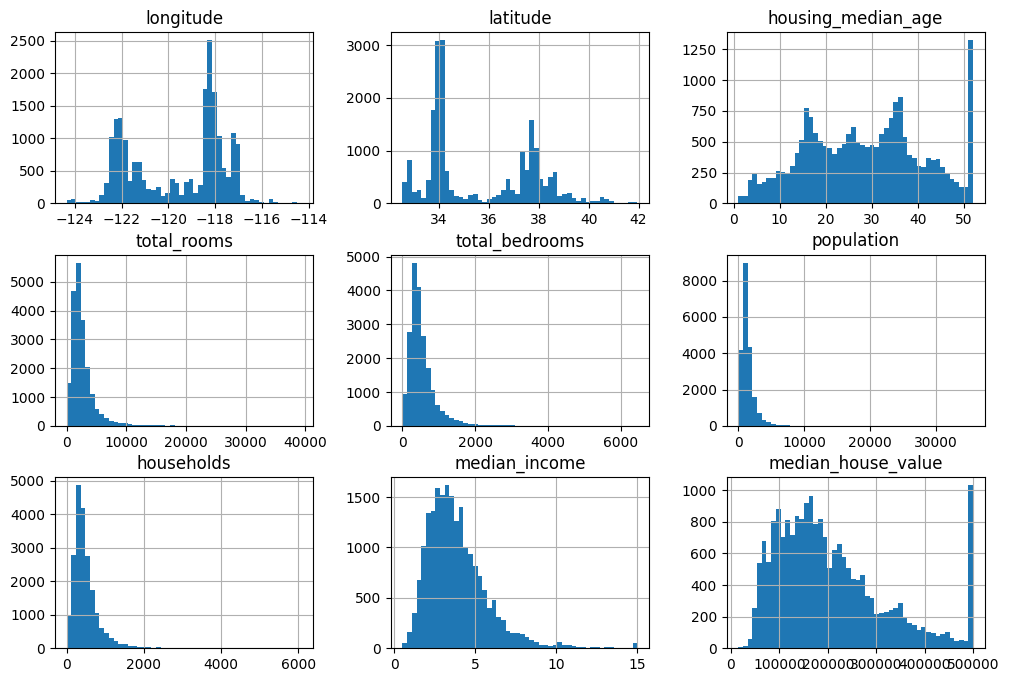

In [37]:
# Univariant Distributions
print(f"Univariant Distributions\n")
housing.hist(bins=50, figsize=(12,8), grid=True)
plt.show()

In [38]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Create a copy of the training set to perform EDA on
housing = train_set.copy()

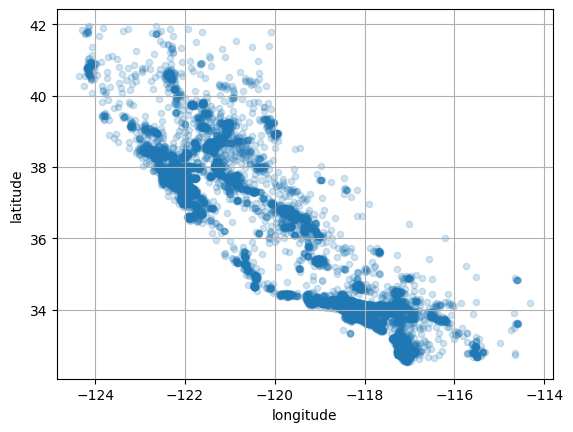

In [39]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, grid=True)
plt.show()

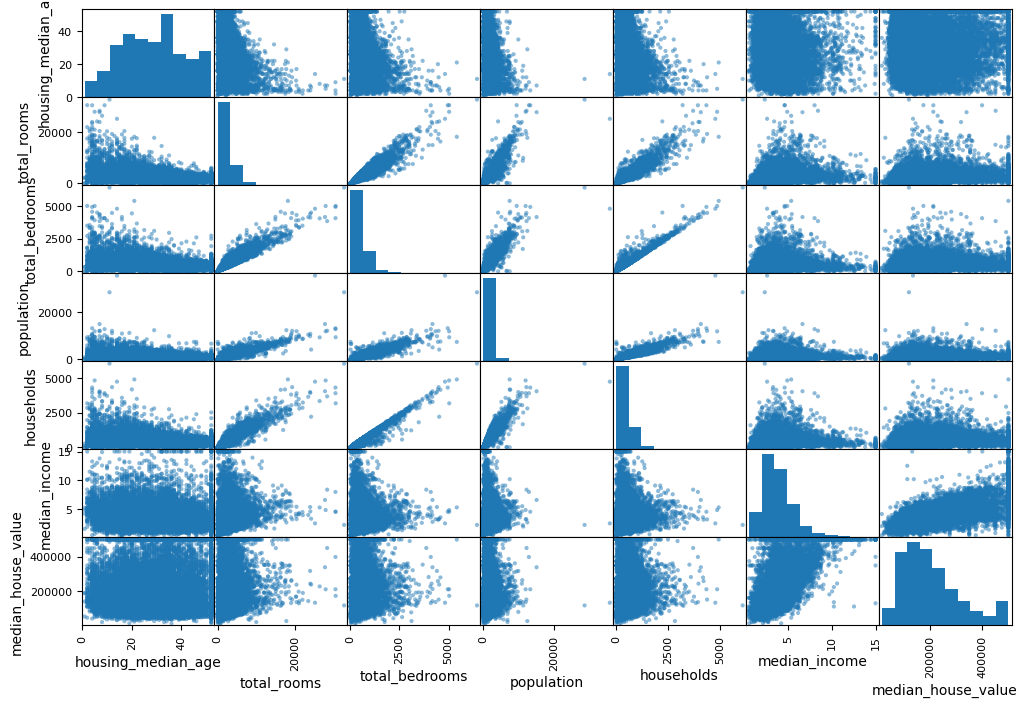

In [43]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing.drop(columns=["latitude", "longitude"]), figsize=(12,8))
plt.show()

In [47]:
# Create some new features
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedroom_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [50]:
housing.select_dtypes(include="number").corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
rooms_per_house       0.146940
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
people_per_house     -0.021577
population           -0.025820
longitude            -0.043603
latitude             -0.146324
bedroom_ratio        -0.254817
Name: median_house_value, dtype: float64

In [62]:
# Prepare the data for machine learning algorithms
housing = train_set.drop(columns=["median_house_value"])
housing_labels = train_set["median_house_value"].copy()

# Set up preprocessing pipelines for numeric and categorical variables
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])

numeric_features = housing.select_dtypes(include="number").columns
categorical_features = housing.select_dtypes(exclude="number").columns

preprocssing_pipeline = ColumnTransformer([
    ("numeric", numeric_pipeline, numeric_features),
    ("categorical", categorical_pipeline, categorical_features)
])

# Create a final pipeline that includes preprocessing and a model
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ("preprocessing", preprocssing_pipeline),
    ("model", RandomForestRegressor(random_state=42))
])

# Score the pipeline without tuning yet
rmses = -cross_val_score(estimator = pipeline, X=housing, y=housing_labels, cv=3, scoring="neg_root_mean_squared_error")
rmses = pd.Series(rmses, name="RMSE")
print(f"CV Results ==> RMSEs:")
display(rmses)
print(f"Mean RMSE: {rmses.mean()}")

CV Results ==> RMSEs:


0    49491.980272
1    50127.967780
2    50069.333504
Name: RMSE, dtype: float64

Mean RMSE: 49896.42718528449


In [64]:
RandomForestRegressor(random_state=42).get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [85]:
# Redo with tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import randint, uniform


numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

numeric_features = housing.select_dtypes(include="number").columns
categorical_features = housing.select_dtypes(exclude="number").columns

preproccessing_pipeline = ColumnTransformer([
("numeric_processor", numeric_pipeline, numeric_features),
("categorical_processor", categorical_pipeline, categorical_features)
])

pipeline = Pipeline([
    ("preprocessing", preproccessing_pipeline),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Set up param search space
param_distribution = {
    "regressor__max_features": ["auto", "sqrt", "log2"],
    "regressor__max_depth": randint(low=1, high=200),
    "regressor__min_samples_split": randint(low=2, high=20),
    "regressor__min_samples_leaf": randint(low=1, high=20),
}

cv = RandomizedSearchCV(pipeline, param_distributions=param_distribution, cv=3, scoring="neg_root_mean_squared_error")

cv.fit(housing, housing_labels)

/Users/nathanjones/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/nathanjones/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/nathanjones/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numeric_processor',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object'...
                   param_distributions={'regressor__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14d3e0dd0>,
                                        'regressor__max_features': ['auto',
                                                                    'sqrt',
                                                                    'log2'],
                                        'regressor__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16d23fc50>,
                                        'regressor__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17799a490>},
                   scoring='neg_root_mean_squared_error')

In [92]:
# Get the results of CV
print(f"Best Estimator = {cv.best_estimator_}\nBest Hyperparameters={cv.best_params_}")

cv_results = pd.DataFrame(cv.cv_results_)
# Change from negative to positive RMSE
score_columns = [x for x in cv_results.columns if ("test_score" in x or "train_score" in x)]
score_columns = [x for x in score_columns if "rank" not in x]
score_columns = [x for x in score_columns if "std" not in x]
cv_results[score_columns] = cv_results[score_columns] * -1

cv_results.sort_values(by="mean_test_score").head(5)

Best Estimator = Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('categorical_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                         

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__max_features,param_regressor__min_samples_leaf,param_regressor__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,3.768654,0.037369,0.063054,0.000844,176,auto,3,2,"{'regressor__max_depth': 176, 'regressor__max_...",49810.615418,50198.601907,50110.055176,50039.757500,166.011448,1
1,3.191873,0.017608,0.049501,0.001118,193,auto,10,15,"{'regressor__max_depth': 193, 'regressor__max_...",52227.121330,52628.623364,52038.802910,52298.182534,245.980098,2
0,0.973984,0.016320,0.056395,0.001659,198,log2,5,9,"{'regressor__max_depth': 198, 'regressor__max_...",52641.650652,52868.096184,52338.118097,52615.954978,217.124225,3
9,0.884136,0.002724,0.049437,0.000186,38,log2,8,5,"{'regressor__max_depth': 38, 'regressor__max_f...",53817.434870,53948.208509,53473.264720,53746.302700,200.312655,4
2,0.848119,0.011823,0.046907,0.000352,193,log2,12,4,"{'regressor__max_depth': 193, 'regressor__max_...",55117.823013,55410.709384,54557.857030,55028.796476,353.820649,5


<a id='Chapter-3'></a>
## Chapter 3

---

<a id='Chapter-3-rn'></a>
### Reading Notes:

**Question 1:**

**Answer:** 

**Question 2:** 

**Answer:** 

<a id='Chapter-3-ex'></a>
### Exercises

<a id='Chapter-4'></a>
## Chapter 4

---

<a id='Chapter-4-rn'></a>
### Reading Notes:

**Question 1:** 

**Answer:** 

**Question 2:** 

**Answer:** 

<a id='Chapter-4-ex'></a>
### Exercises

<a id='Chapter-5'></a>
## Chapter 5

---

<a id='Chapter-6'></a>
## Chapter 6

---

<a id='Chapter-7'></a>
## Chapter 7

---

<a id='Chapter-8'></a>
## Chapter 8

---

<a id='Chapter-9'></a>
## Chapter 9

---

<a id='Chapter-10'></a>
## Chapter 10

---

<a id='Chapter-11'></a>
## Chapter 11

---

<a id='Chapter-12'></a>
## Chapter 12

---